In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
adata = sc.read('../../../pipeline/data/multigrate_mil/hlca_healthy_copd_embed_balanced/1fe5654238_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 152766 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [4]:
sc.pp.neighbors(adata)

In [5]:
sc.tl.umap(adata)

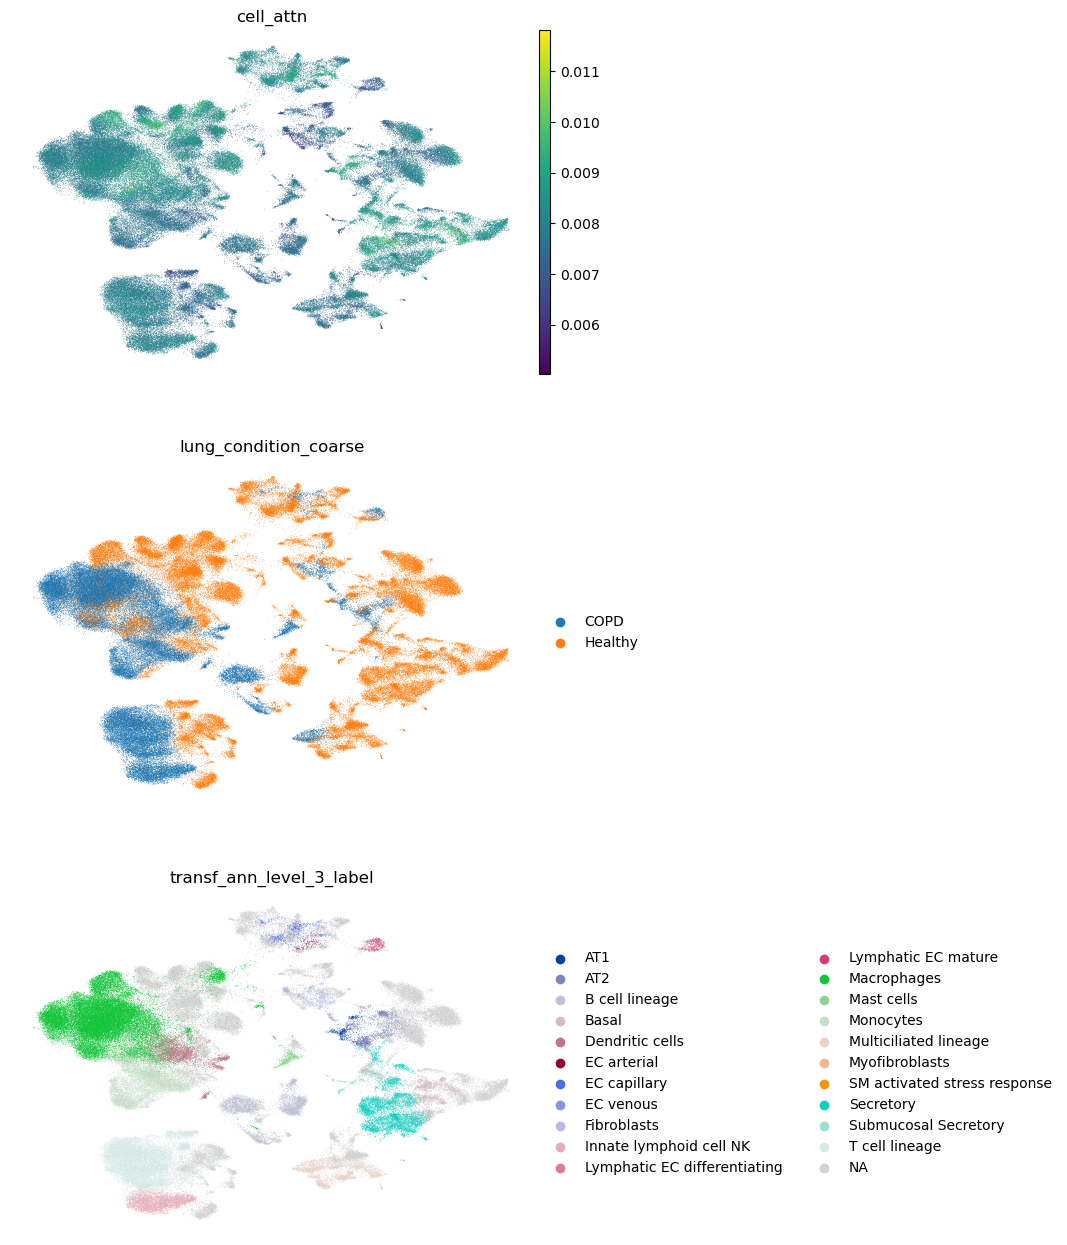

In [6]:
sc.pl.umap(adata, color=['cell_attn', 'lung_condition_coarse', 'transf_ann_level_3_label'], ncols=1, frameon=False)

-------- COPD -------


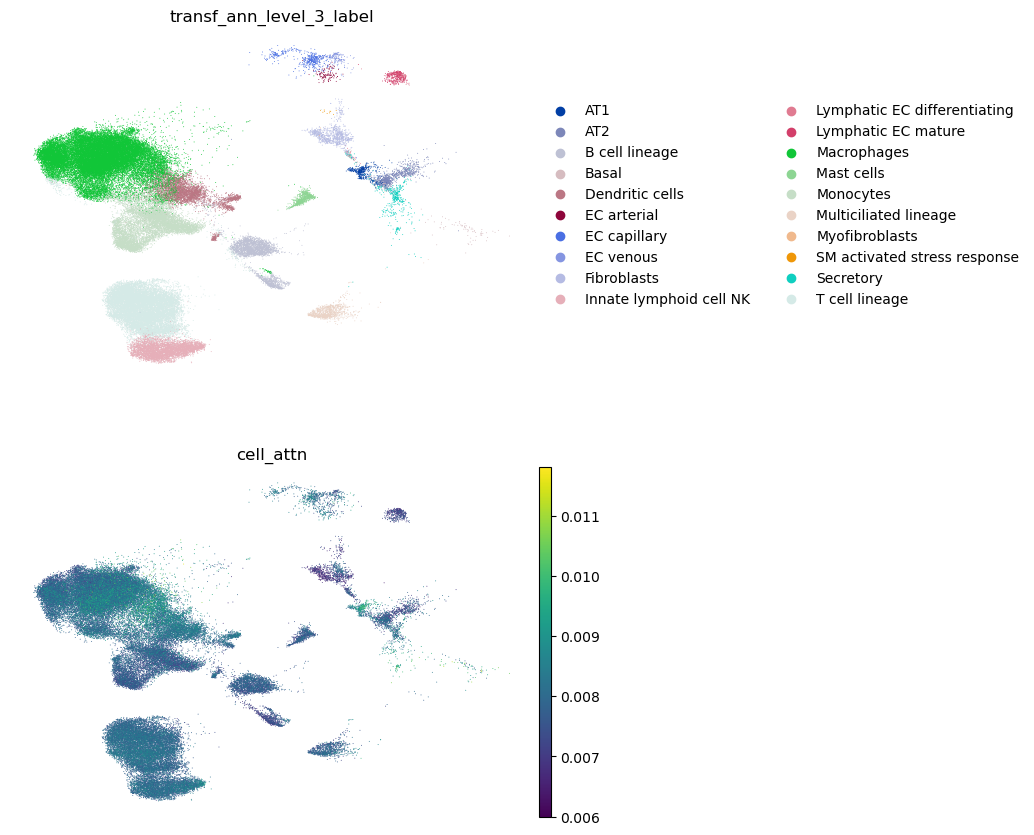

-------- Healthy -------


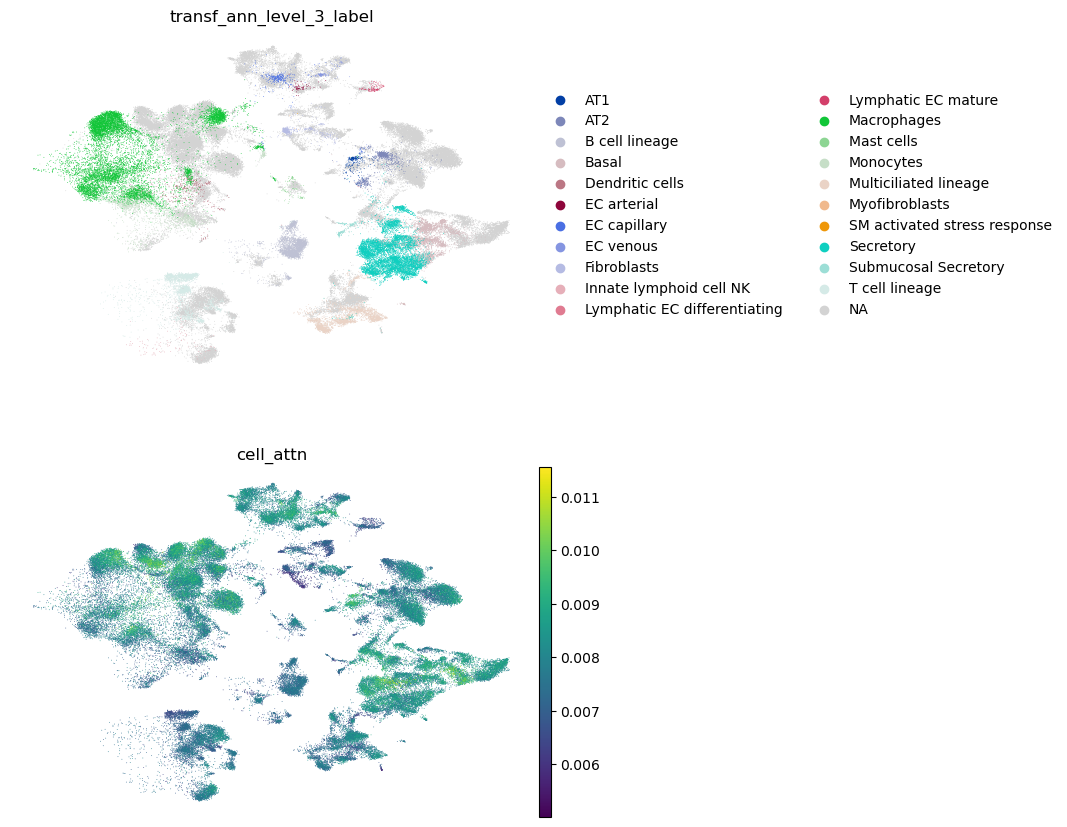

In [7]:
for cond in np.unique(adata.obs['lung_condition_coarse']):
    adata_tmp = adata[adata.obs['lung_condition_coarse'] == cond].copy()
    print(f'-------- {cond} -------')
    sc.pl.umap(
        adata_tmp,
        color=['transf_ann_level_3_label', 'cell_attn'],
        ncols=1,
        frameon=False
    )

In [8]:
dfs = []
for cond in np.unique(adata.obs['lung_condition_coarse']):
    adata_tmp = adata[adata.obs['lung_condition_coarse'] == cond].copy()
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    adata.obs[f'top_cells_{cond}'] = False
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['transf_ann_level_3_label', 'lung_condition_coarse']])

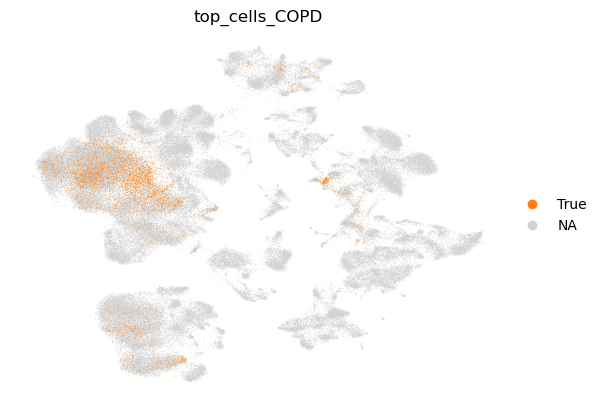

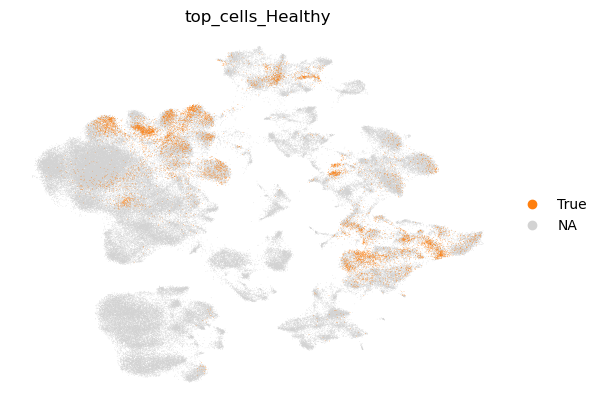

In [9]:
for cond in np.unique(adata.obs['lung_condition_coarse']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [12]:
x=2

431


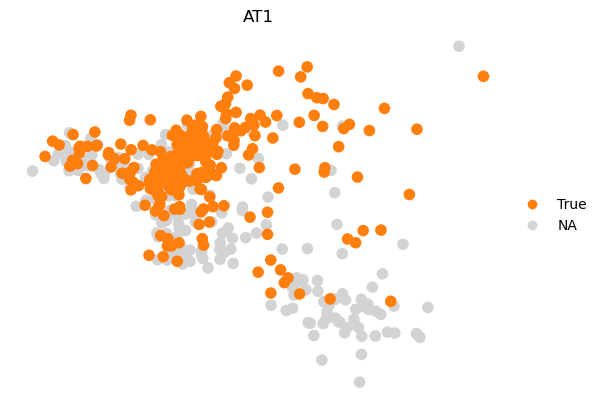

899


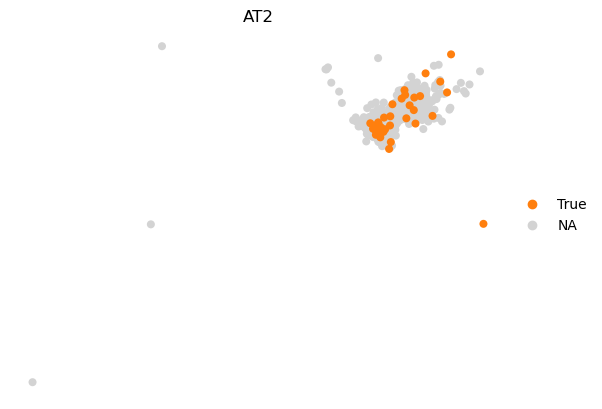

2968


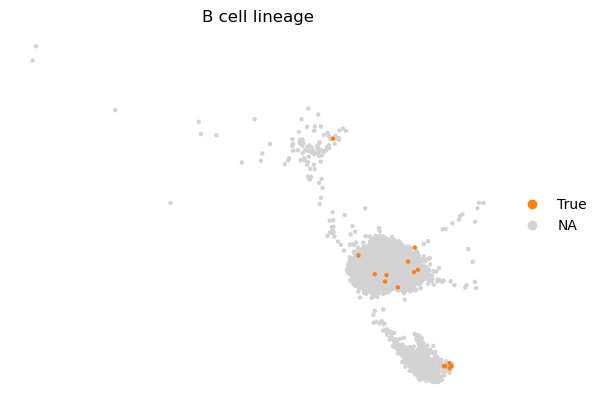

184


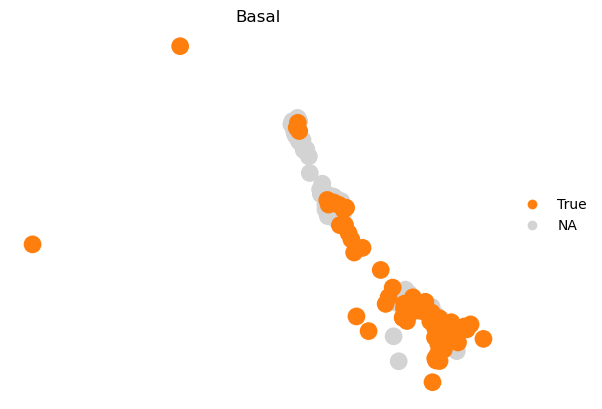

3877


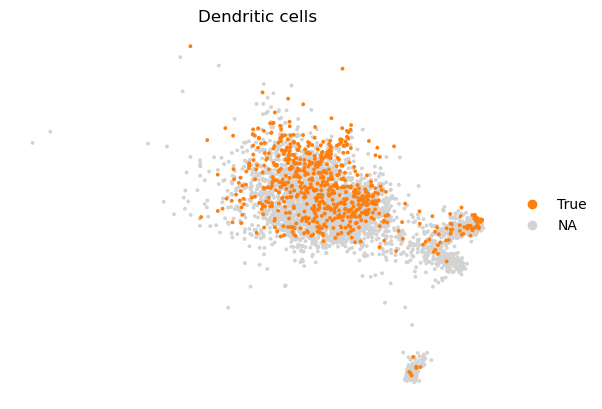

117


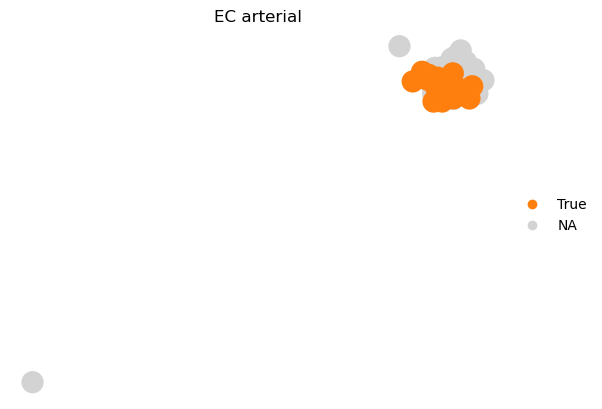

474


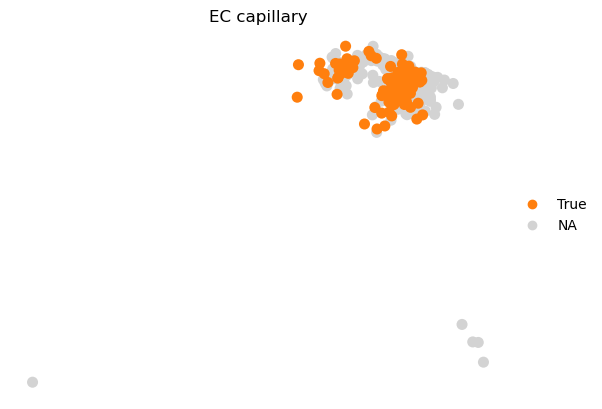

165


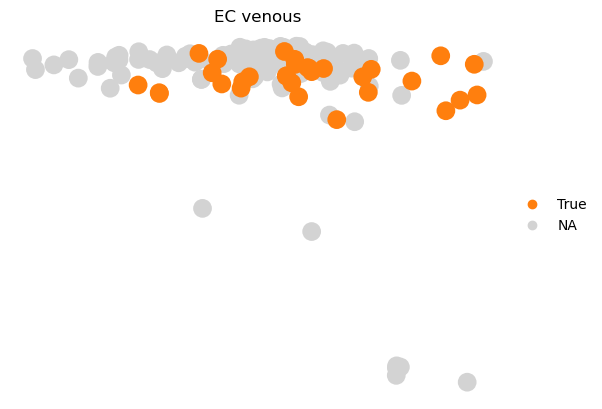

862


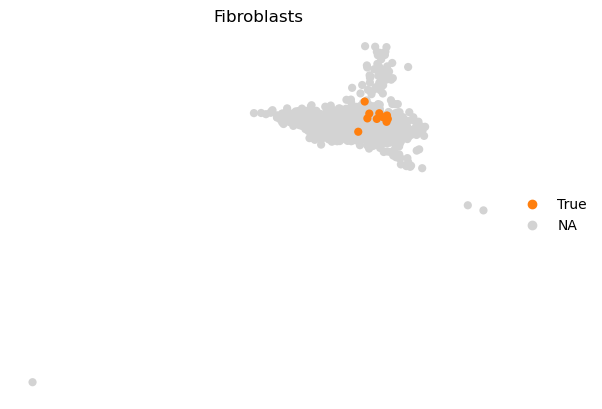

4766


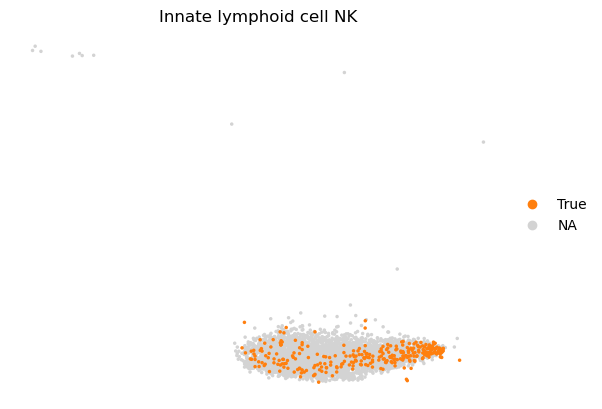

93


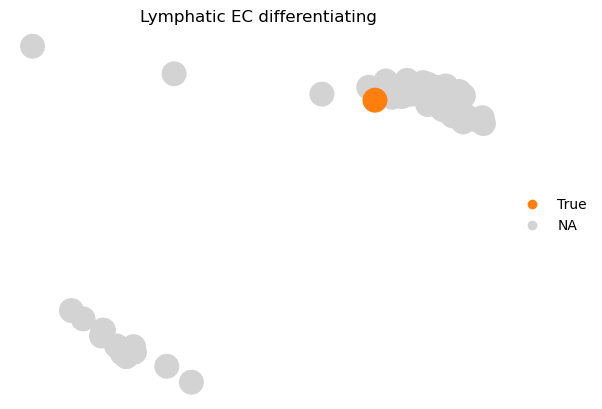

328


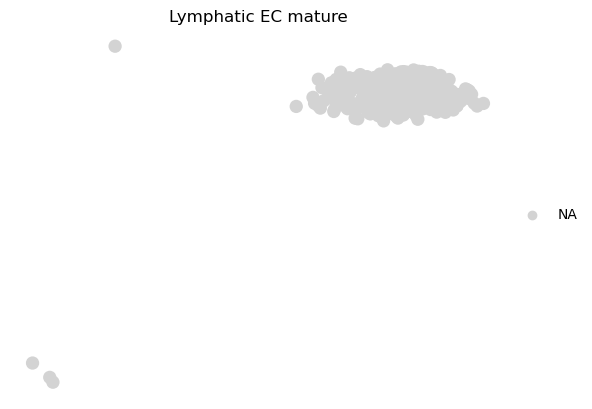

28136


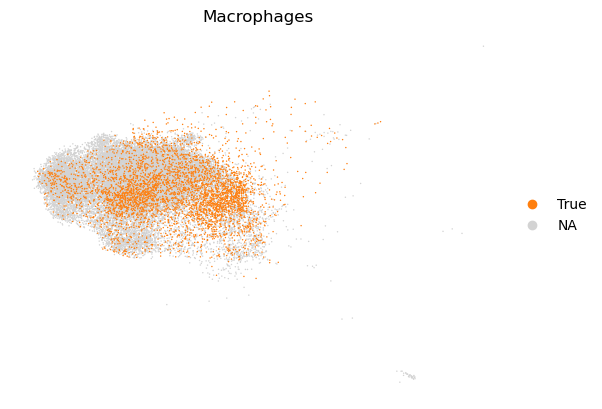

684


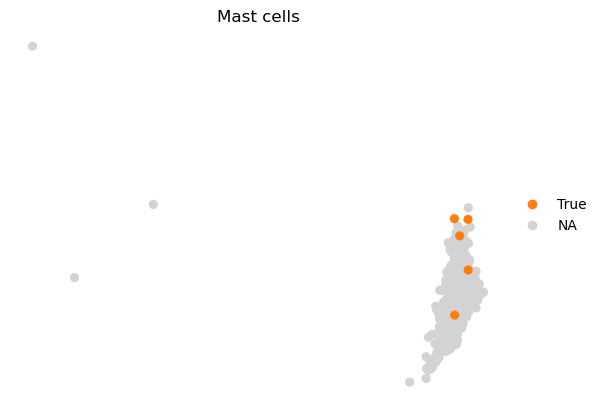

8578


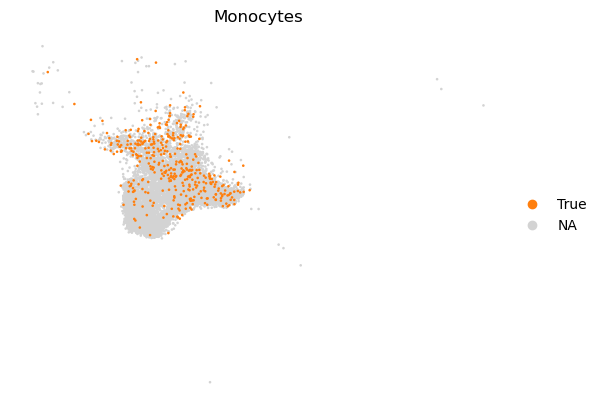

946


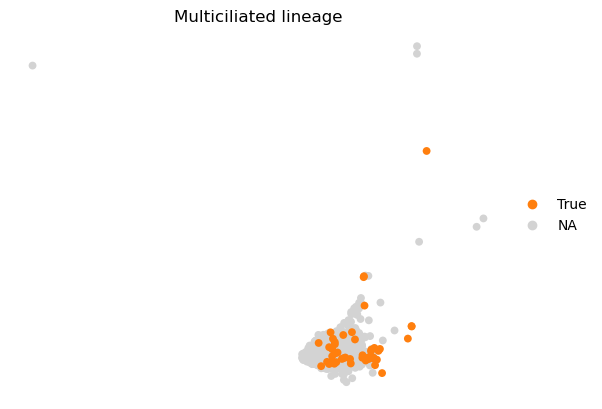

3


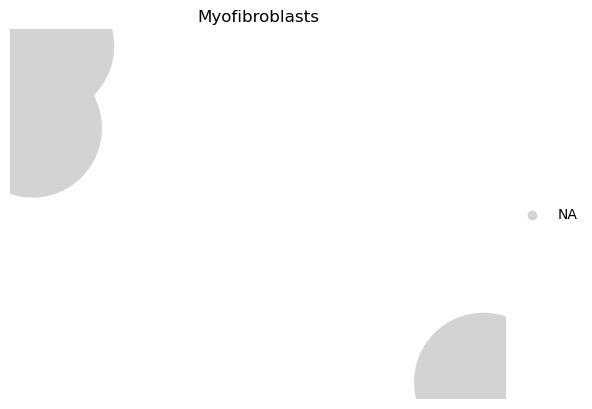

10


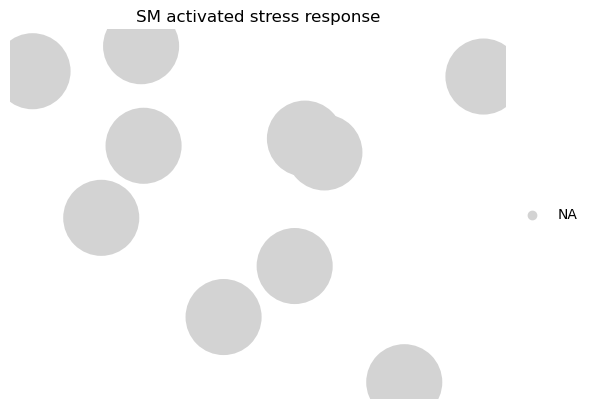

463


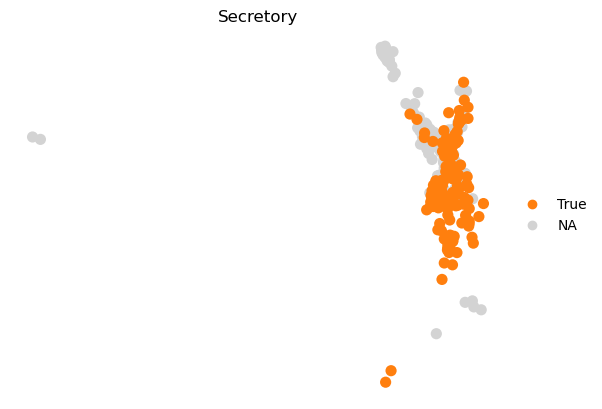

0
13703


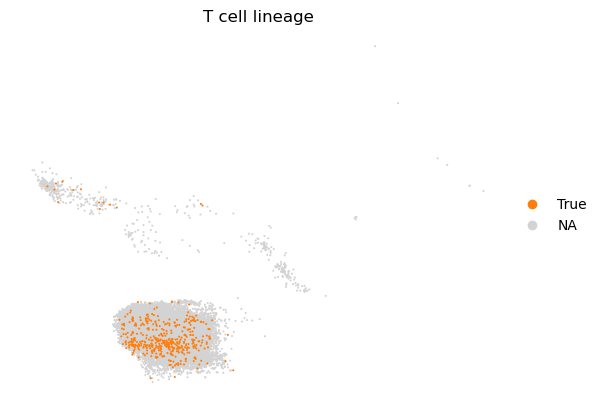

0


In [16]:
for ct in np.unique(adata.obs['transf_ann_level_3_label'].astype(str)):
    tmp = adata[adata.obs['transf_ann_level_3_label'] == ct].copy()
    tmp = tmp[tmp.obs['lung_condition_coarse'] == 'COPD'].copy()
    print(len(tmp))
    if len(tmp) == 0:
        continue
    sc.pl.umap(tmp, color=[f'top_cells_COPD'], title=f'{ct}', groups=[True], frameon=False)

6


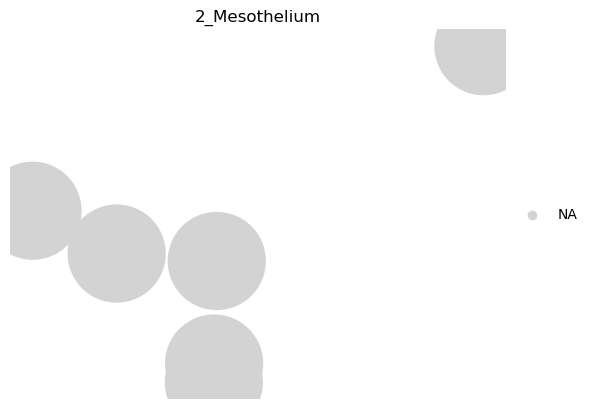

0
433


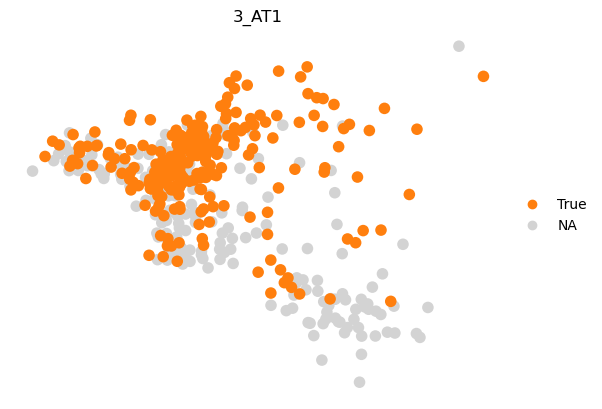

912


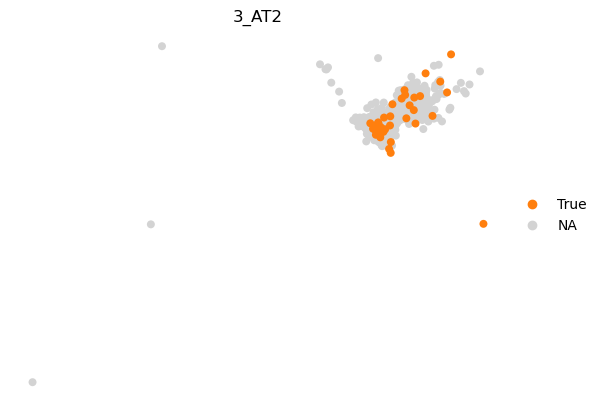

117


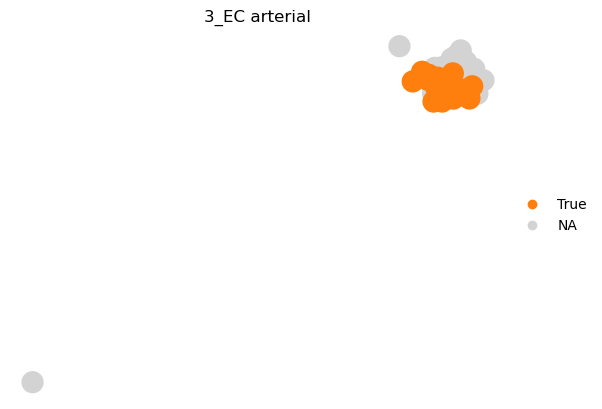

95


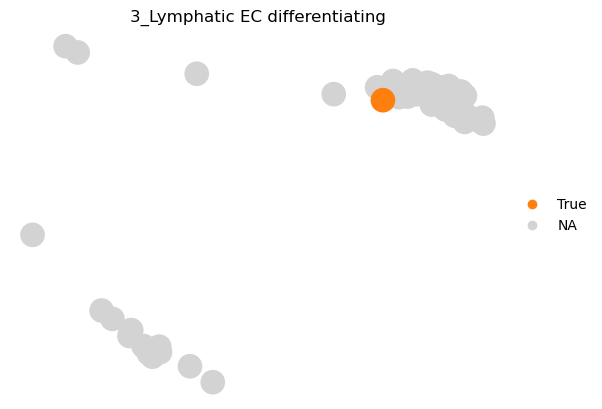

328


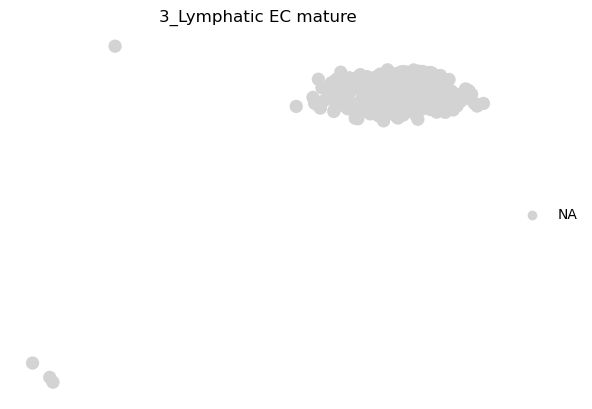

685


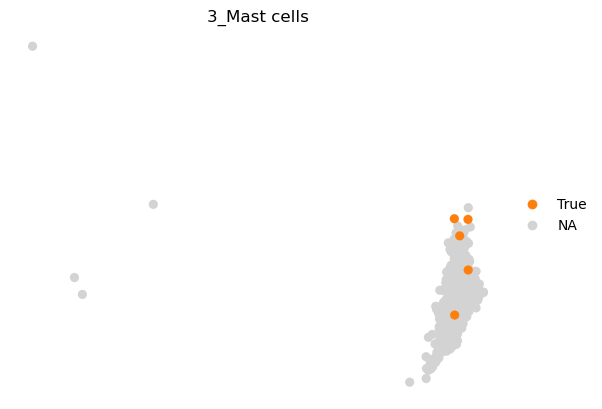

4


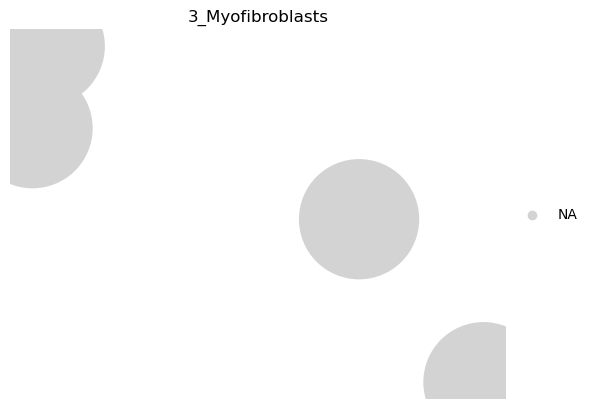

10


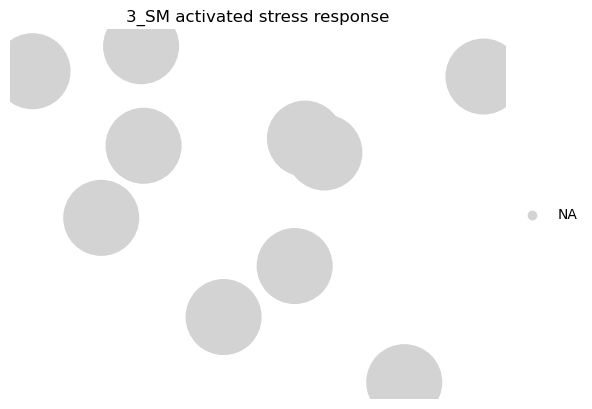

1


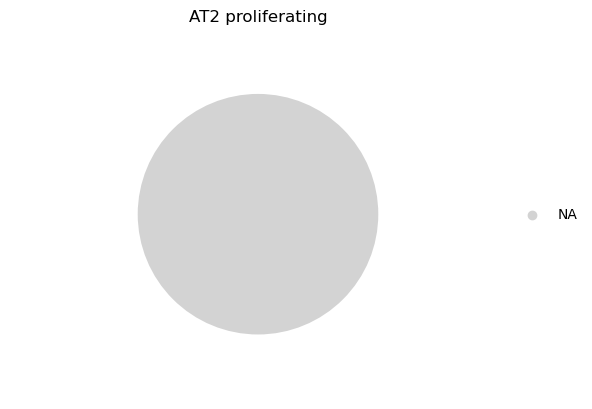

342


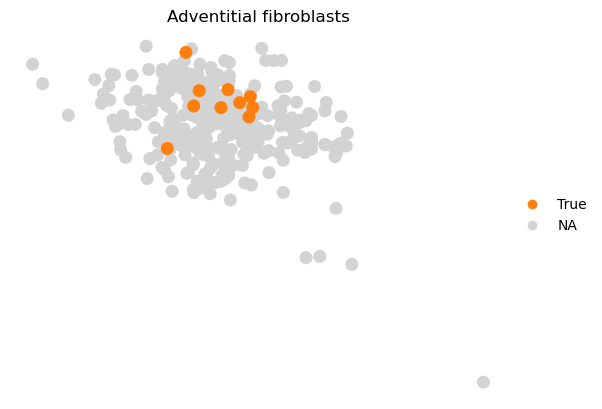

359


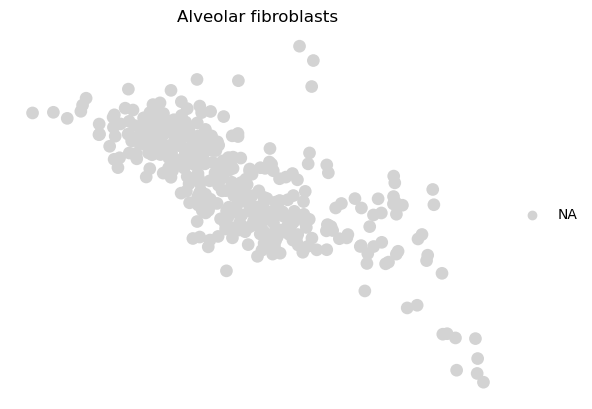

25507


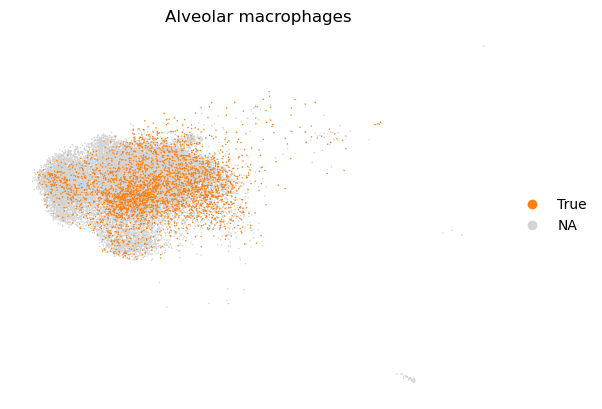

2364


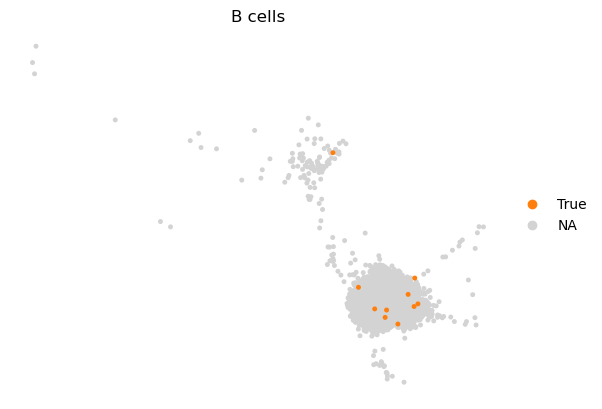

102


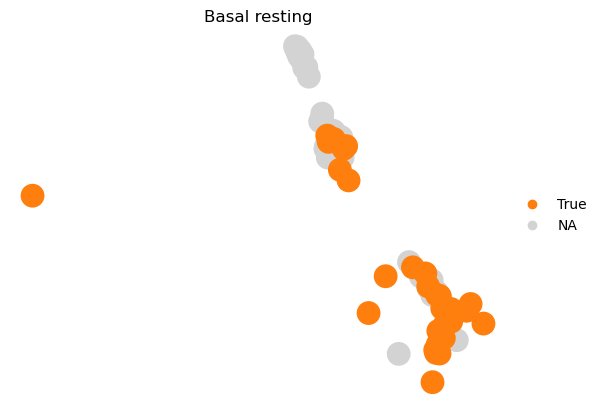

5528


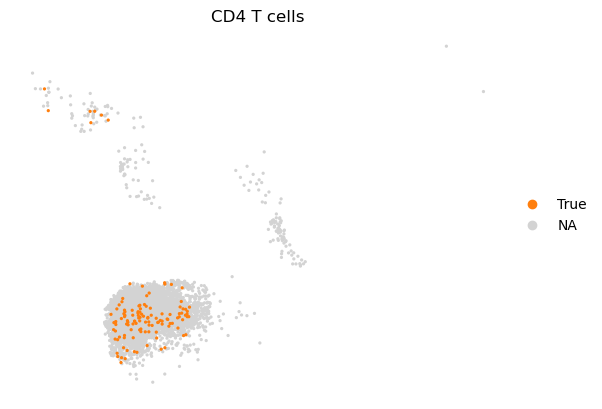

8160


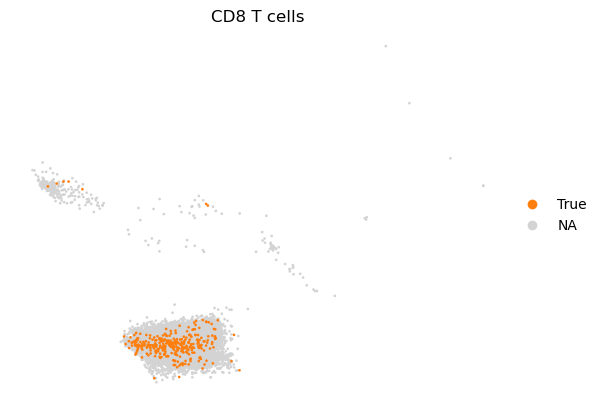

5169


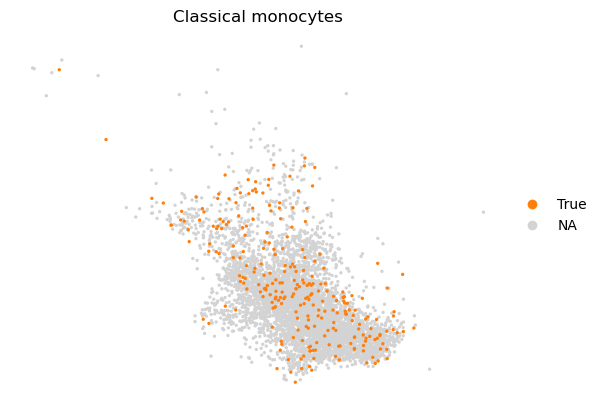

36


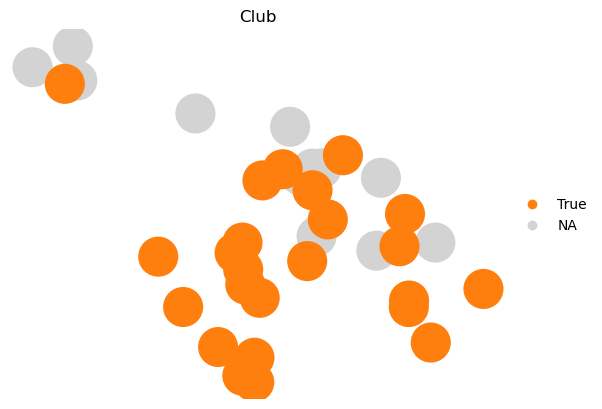

167


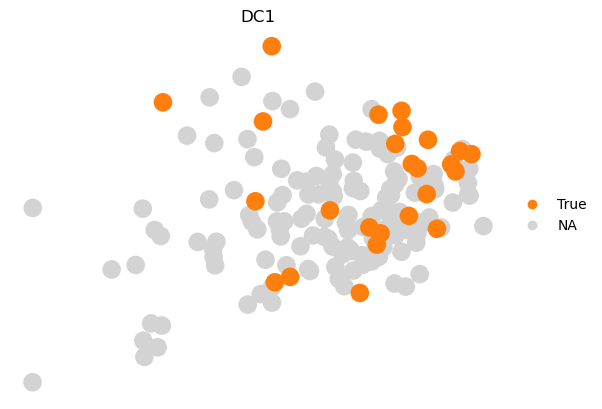

3463


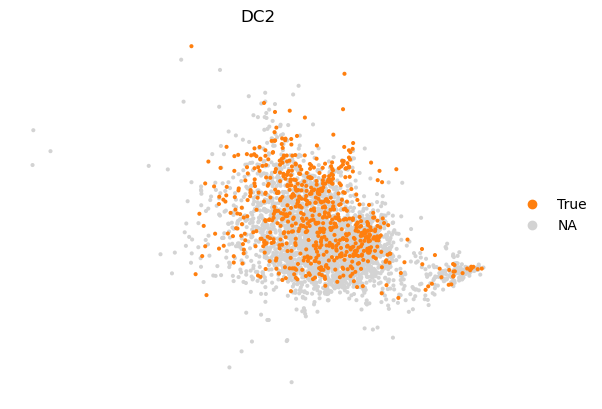

3


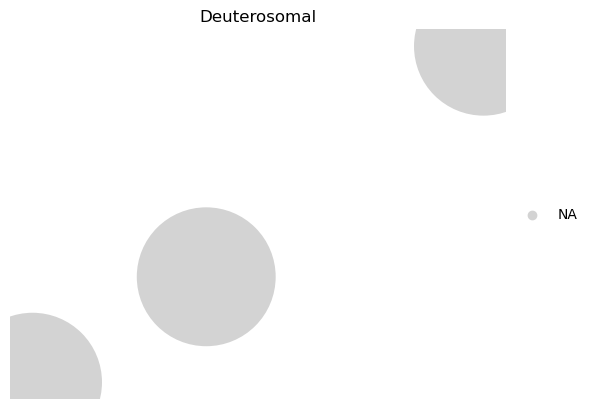

119


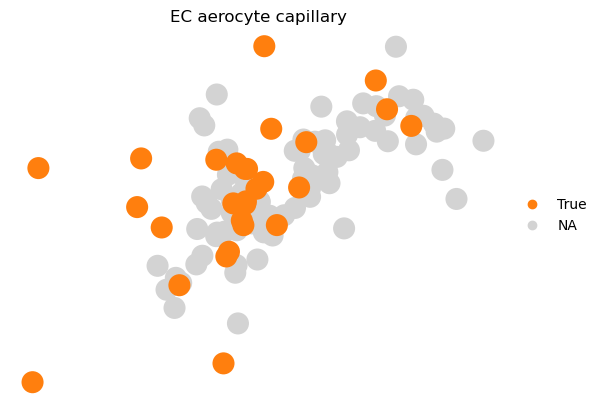

360


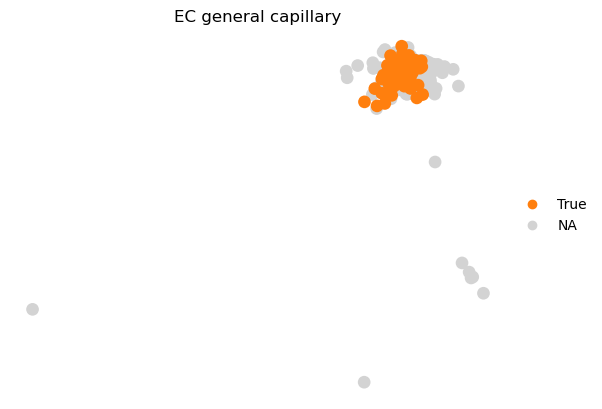

75


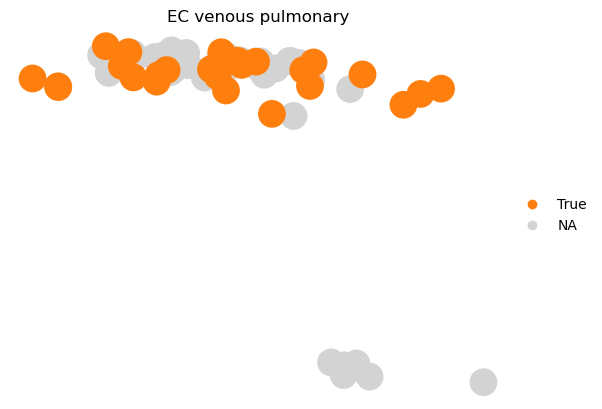

89


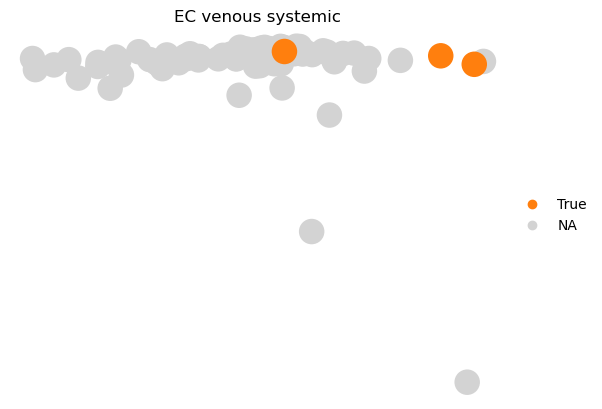

129


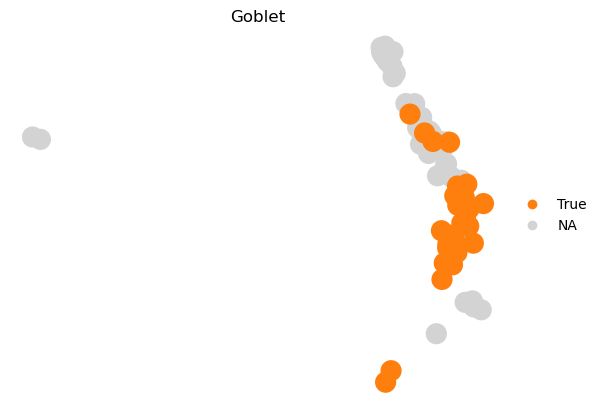

3


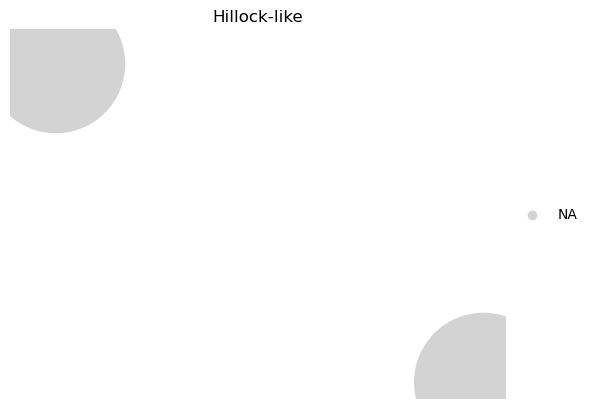

2536


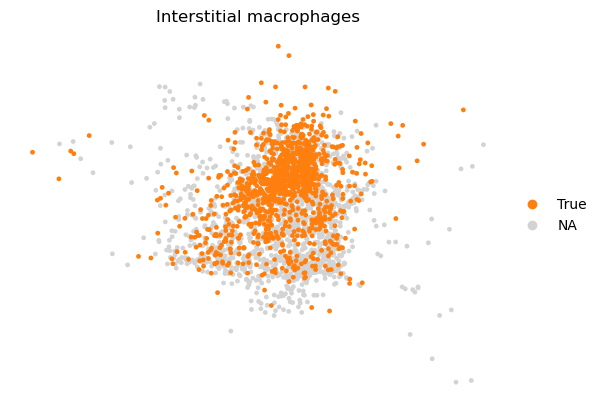

234


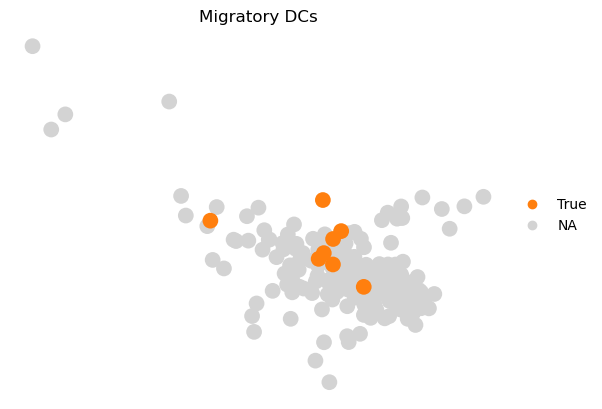

945


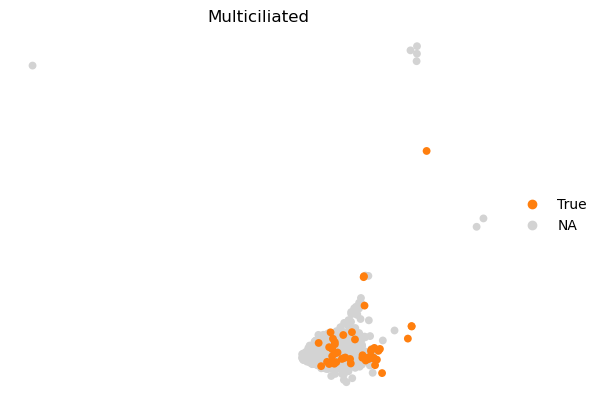

4766


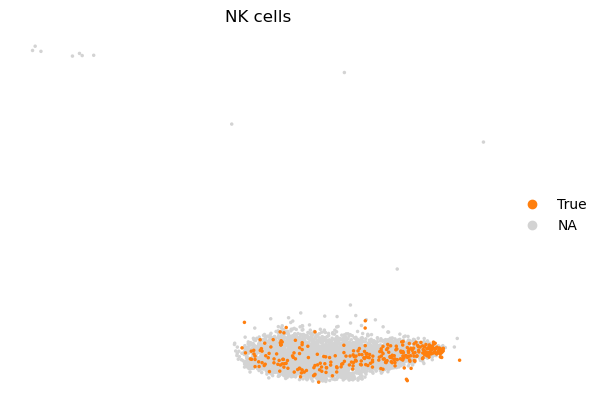

3350


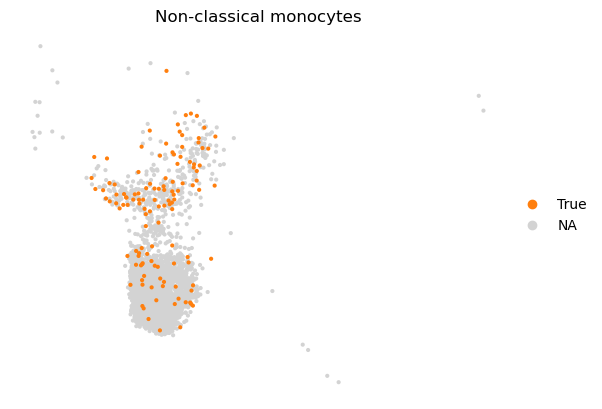

74


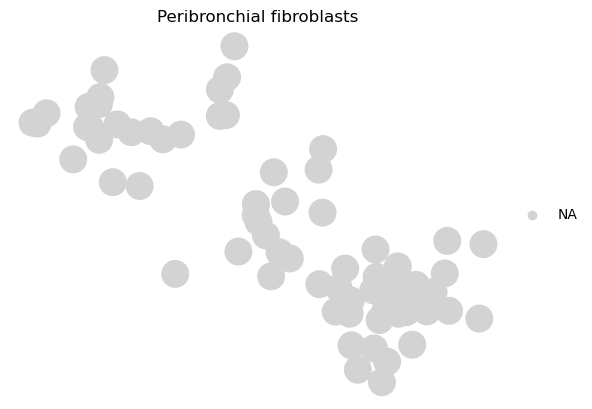

63


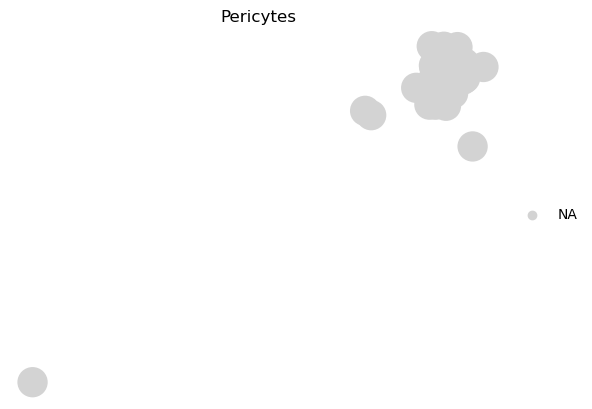

614


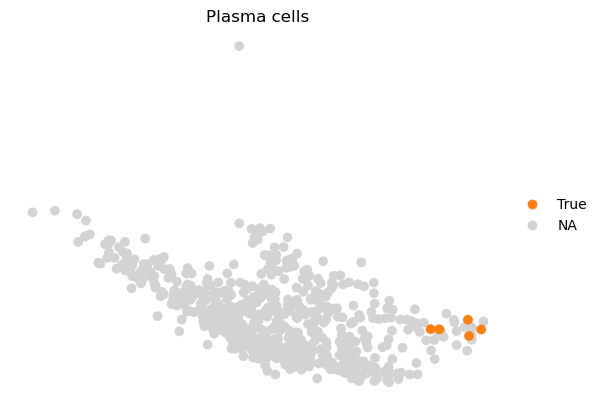

165


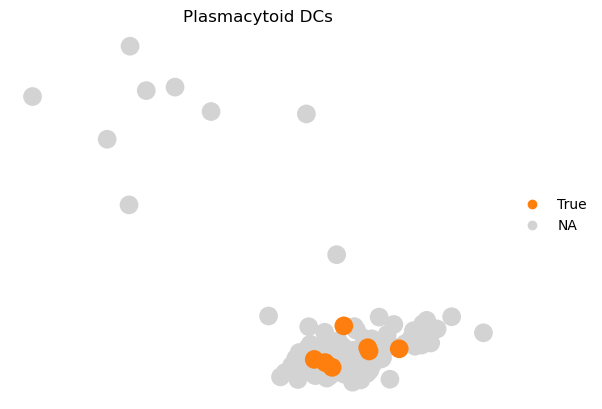

0
0
0
17


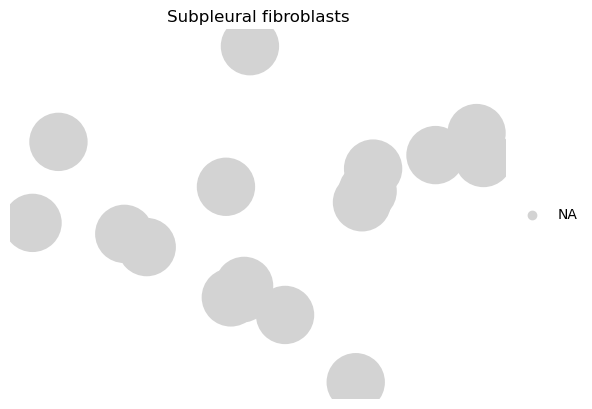

65


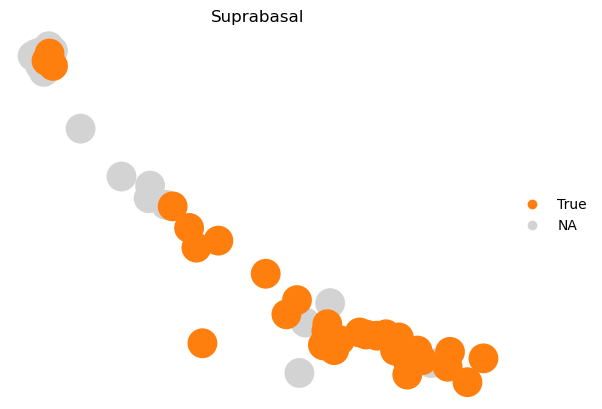

3


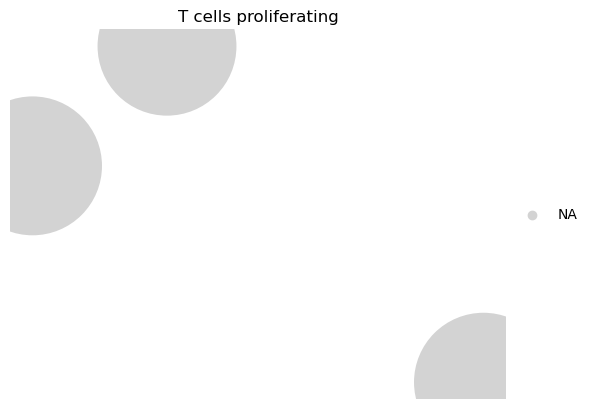

289


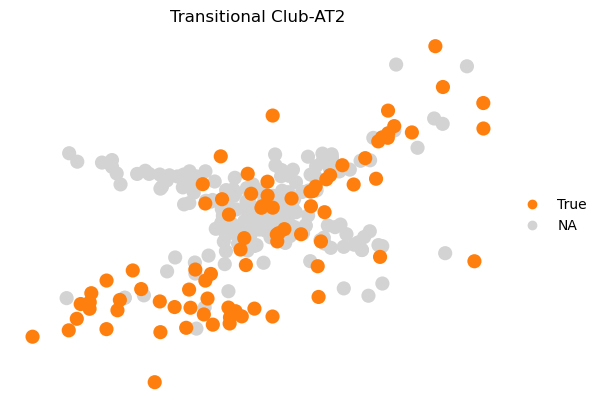

0
0


In [17]:
for ct in np.unique(adata.obs['transf_ann_level_4_label'].astype(str)):
    tmp = adata[adata.obs['transf_ann_level_4_label'] == ct].copy()
    tmp = tmp[tmp.obs['lung_condition_coarse'] == 'COPD'].copy()
    print(len(tmp))
    if len(tmp) == 0:
        continue
    sc.pl.umap(tmp, color=[f'top_cells_COPD'], title=f'{ct}', groups=[True], frameon=False)